**Importing Libraries**

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op


**Data Fetching from Excel file**

In [28]:
A1=np.empty((0,5))
U1=np.empty((0,7))
node=['150','149',]
mon=['Mar','Apr']
for j in node:
  for i in mon:
    inp= pd.read_excel('/content/drive/My Drive/Project/data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.xlsx',usecols=[1,2,3,15,16])
    out= pd.read_excel('/content/drive/My Drive/Project/data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.xlsx',usecols=[5,6,7,8,17,18,19])
    
    inp=np.array(inp)
    out=np.array(out)
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90327e+05 6.22530e+04 3.03200e+01 5.46700e+01]
 [1.50000e+02 1.90327e+05 6.23530e+04 3.03200e+01 5.43900e+01]
 [1.50000e+02 1.90327e+05 9.04420e+04 3.27300e+01 6.27800e+01]
 ...
 [1.49000e+02 1.90430e+05 1.23000e+05 3.16100e+01 6.19000e+01]
 [1.49000e+02 1.90430e+05 1.23100e+05 3.16100e+01 6.22700e+01]
 [1.49000e+02 1.90430e+05 1.23200e+05 3.16000e+01 6.22100e+01]]
[[ 16.     5.   -18.   ...   3.74   4.36   4.38]
 [ 12.     2.   -49.   ...   3.01   3.62   3.65]
 [123.    55.   132.   ...  10.96  14.16  15.52]
 ...
 [ 55.    17.   -57.   ...   5.52   7.23  16.29]
 [ 58.    21.   -58.   ...   6.29   7.65   7.92]
 [ 59.    23.   -57.   ...   6.38   7.89   8.09]]


**XGboost Regression Model**

In [29]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

#creating object of sgboostregressor
model=MultiOutputRegressor(XGBRegressor(objective ='reg:squarederror',max_depth=8,cosample_bytree=.5,learning_rate=.1,min_child_weight=3,
                   n_estimators=200,subsample=.7))
#training the model
model.fit(x_train,y_train)
print("Model training is Done!!")


Model training is Done!!


 **Finding Out R^2 Score on XGBRegression Model** 

r2 score on train data 0.9426134014720243
r2 score on test data 0.8623226304872951
Y_Test: [[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
Y_Test_Predict: [[0.8358072  0.46971342 0.36235344 ... 0.01546791 0.00907588 0.01084411]
 [0.83622706 0.46684238 0.39018792 ... 0.01173508 0.00774854 0.00859064]
 [0.8613768  0.4627241  0.3586766  ... 0.02644098 0.01644659 0.01661077]
 ...
 [0.85550195 0.47132188 0.36633193 ... 0.00380644 0.00232175 0.00316933]
 [0.8655609  0.46606508 0.3674847  ... 0.01763761 0.01199895 0.01354396]
 [0.8328502  0.47040194 0.34450817 ... 0.00734317 0.00435343 0.00483993]]


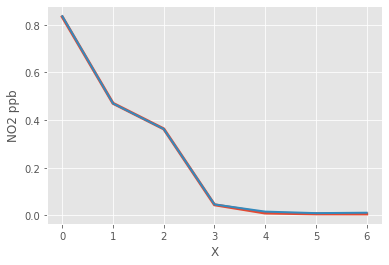

In [30]:
import xgboost
#finding out the r2 score
y_train_pred=model.predict(x_train)
r2_train_xg=r2_score(y_train,y_train_pred)

y_test_pred=model.predict(x_test)
r2_scr_xg=r2_score(y_test,y_test_pred)

print('r2 score on train data '+str(r2_train_xg))
print('r2 score on test data '+ str(r2_scr_xg))

# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred)

from matplotlib import style

style.use('ggplot')

plt.plot(y_test[0],linewidth=3, markersize=12)
plt.plot(y_test_pred[0],linewidth=2, markersize=12)

plt.xlabel('X')
plt.ylabel('NO2 ppb')

plt.show()




**Importing Data** **RandomForest Regressor Model**

In [31]:
A1=np.empty((0,5))
U1=np.empty((0,7))
node=['150','149',]
mon=['Mar','Apr']
for j in node:
  for i in mon:
    inp= pd.read_excel('/content/drive/My Drive/Project/data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.xlsx',usecols=[1,2,3,15,16])
    out= pd.read_excel('/content/drive/My Drive/Project/data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.xlsx',usecols=[5,6,7,8,17,18,19])
    
    inp=np.array(inp)
    out=np.array(out)
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90327e+05 6.22530e+04 3.03200e+01 5.46700e+01]
 [1.50000e+02 1.90327e+05 6.23530e+04 3.03200e+01 5.43900e+01]
 [1.50000e+02 1.90327e+05 9.04420e+04 3.27300e+01 6.27800e+01]
 ...
 [1.49000e+02 1.90430e+05 1.23000e+05 3.16100e+01 6.19000e+01]
 [1.49000e+02 1.90430e+05 1.23100e+05 3.16100e+01 6.22700e+01]
 [1.49000e+02 1.90430e+05 1.23200e+05 3.16000e+01 6.22100e+01]]
[[ 16.     5.   -18.   ...   3.74   4.36   4.38]
 [ 12.     2.   -49.   ...   3.01   3.62   3.65]
 [123.    55.   132.   ...  10.96  14.16  15.52]
 ...
 [ 55.    17.   -57.   ...   5.52   7.23  16.29]
 [ 58.    21.   -58.   ...   6.29   7.65   7.92]
 [ 59.    23.   -57.   ...   6.38   7.89   8.09]]


**RandomForest Regressor Model**

In [32]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

model=MultiOutputRegressor(RandomForestRegressor(max_depth=8,n_estimators=200))

#training the model
model.fit(x_train,y_train)
print("Model training is Done!!")


Model training is Done!!


**R^2 Score on RandomForestRegressor**

r2 score on train data 0.7190657602366118
r2 score on test data 0.714416385622097
Y_Test: [[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
Y_Test_Predict: [[0.84410071 0.47030787 0.36084189 ... 0.01157484 0.01004969 0.01159574]
 [0.82247775 0.46204381 0.40209448 ... 0.01391447 0.00856385 0.00941081]
 [0.86060023 0.46397725 0.35404718 ... 0.03076446 0.01973304 0.01961199]
 ...
 [0.84456044 0.47791349 0.36185296 ... 0.00356996 0.00250783 0.00341606]
 [0.86497911 0.46646187 0.35105288 ... 0.01428454 0.00912093 0.01098616]
 [0.83331283 0.46970111 0.34729654 ... 0.00835006 0.00516581 0.00563506]]


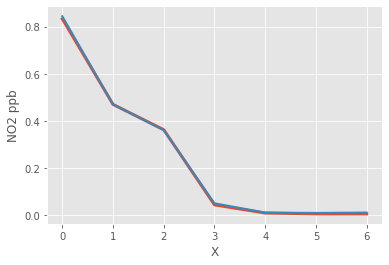

In [33]:
#finding out the r2 score
y_train_pred=model.predict(x_train)
r2_train_rf=r2_score(y_train,y_train_pred)

y_test_pred=model.predict(x_test)
r2_scr_rf=r2_score(y_test,y_test_pred)

print('r2 score on train data '+str(r2_train_rf))
print('r2 score on test data '+ str(r2_scr_rf))

# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred)

from matplotlib import style

style.use('ggplot')

plt.plot(y_test[0],linewidth=3, markersize=12)
plt.plot(y_test_pred[0],linewidth=2, markersize=12)

plt.xlabel('X')
plt.ylabel('NO2 ppb')

plt.show()


In [34]:
implemented_models={'Model':['XGBoost Regression','RandomForest Regression'],'R^2 Score on Train Data':[r2_train_xg,r2_train_rf],'R^2 Score on Test Data':[r2_scr_xg,r2_scr_rf]}
df=pd.DataFrame(implemented_models)
print(df)

                     Model  R^2 Score on Train Data  R^2 Score on Test Data
0       XGBoost Regression                 0.942613                0.862323
1  RandomForest Regression                 0.719066                0.714416


##Vector Auto Regression Model (VAR)

In [35]:
A1=np.empty((0,5))
U1=np.empty((0,7))
node=['150','149']
mon=['Mar']
for j in node:
  for i in mon:
    inp= pd.read_excel('/content/drive/My Drive/Project/data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.xlsx',usecols=[1,2,3,15,16])
    out= pd.read_excel('/content/drive/My Drive/Project/data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.xlsx',usecols=[5,6,7,8,17,18,19])
    print(inp.head())
    print(out.head())
    # inp=inp.diff(periods=1)
    
    inp=np.array(inp)
    # inp[np.isnan(inp)]= np.nanmean(inp)
    # print(inp)
    out=np.array(out)
    print("Size of inp:",inp.size)
    print("Shape of inp: ",inp.shape)

    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

# print(U1)


   Node    Date   Time  Ext Temp  Ext RH
0   150  190327  62253     30.32   54.67
1   150  190327  62353     30.32   54.39
2   150  190327  90442     32.73   62.78
3   150  190327  90542     32.78   62.82
4   150  190327  90642     32.84   62.66
   NO2 ppb  O3 ppb  NO ppb  CO ppb    PM1  PM 2.5  PM 10
0       16       5     -18    2907   3.74    4.36   4.38
1       12       2     -49    1379   3.01    3.62   3.65
2      123      55     132   14613  10.96   14.16  15.52
3       90      39      28    2420  10.41   14.06  18.64
4       82       8       3    1438  11.67   14.80  16.43
Size of inp: 33155
Shape of inp:  (6631, 5)
   Node    Date   Time  Ext Temp  Ext RH
0   149  190306  51335     29.44   45.45
1   149  190306  51435     29.45   45.18
2   149  190306  51535     29.46   45.15
3   149  190306  51635     29.48   45.09
4   149  190306  51735     29.49   44.87
   NO2 ppb  O3 ppb  NO ppb  CO ppb   PM1  PM 2.5  PM 10
0       13     -25     244    9808  6.04    6.51   6.52
1       11

**Plotting Graphs of all values**

[150. 150. 150. ... 149. 149. 149.]


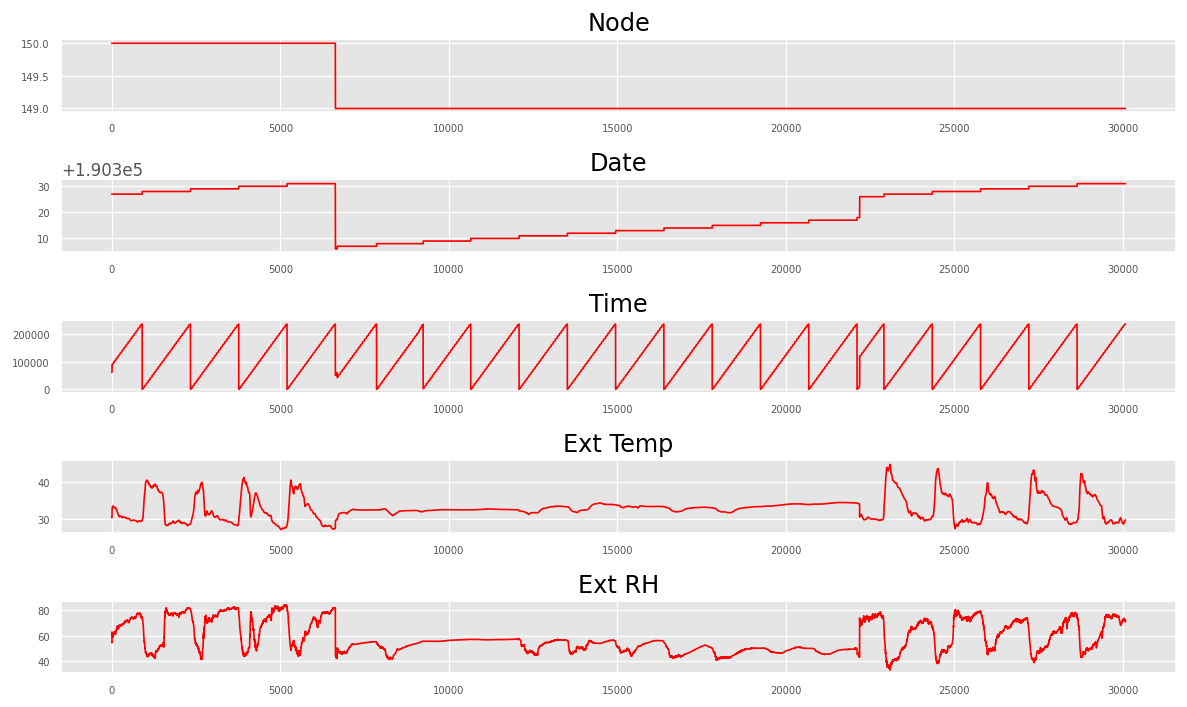

In [36]:

data=A1[:,0]
name=["Node","Date","Time","Ext Temp","Ext RH"]
print(data)
fig,axes =plt.subplots(nrows=5,ncols=1,dpi=120,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data=A1[:,i]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(name[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)
  ax.tick_params(labelsize=6)

plt.tight_layout();


[ 16.  12. 123. ...  32.  34.  39.]


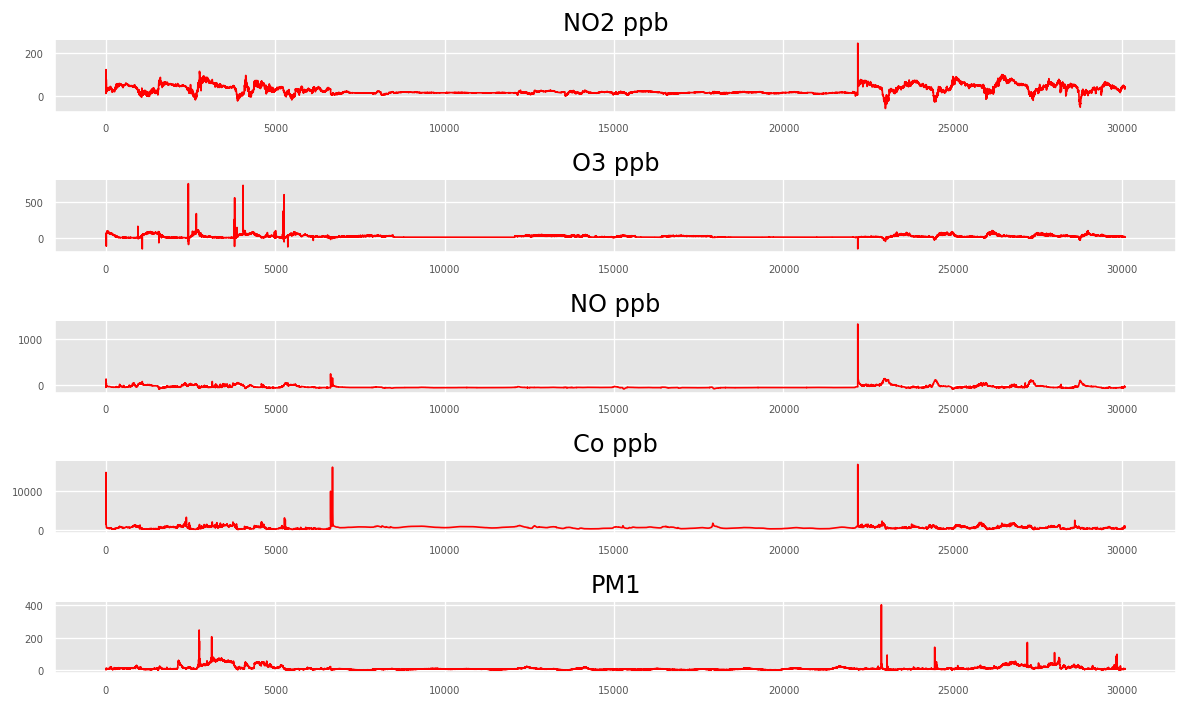

In [37]:

data=U1[:,0]
name=["NO2 ppb","O3 ppb","NO ppb","Co ppb","PM1","PM 2.5","PM 10"]
print(data)
fig,axes =plt.subplots(nrows=5,ncols=1,dpi=120,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data=U1[:,i]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(name[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)
  ax.tick_params(labelsize=6)

plt.tight_layout();


**Augmented Dickey–Fuller test for checking stationarity**

if p value is less then 0.50 it means it is in stationary 

In [38]:
# print(A1[0:,2])
from statsmodels.tsa.stattools import adfuller
for i in range(0,7):
  ad_fuller_result_1=adfuller(U1[:,i])
  print('realgdp')
  print(f'ADF Statistic: {ad_fuller_result_1[0]}')
  print(f'p-value: {ad_fuller_result_1[1]}')

  print('\n----------------------------\n')



realgdp
ADF Statistic: -6.499513863732908
p-value: 1.1713554562057735e-08

----------------------------

realgdp
ADF Statistic: -6.889703247129741
p-value: 1.365615354935696e-09

----------------------------

realgdp
ADF Statistic: -8.039813609780635
p-value: 1.8600728014445027e-12

----------------------------

realgdp
ADF Statistic: -8.479302227990155
p-value: 1.4072718714318328e-13

----------------------------

realgdp
ADF Statistic: -6.40548700290428
p-value: 1.9480169330533356e-08

----------------------------

realgdp
ADF Statistic: -6.5552213402285675
p-value: 8.650369138726101e-09

----------------------------

realgdp
ADF Statistic: -6.787492727392265
p-value: 2.4113158531477624e-09

----------------------------



In [39]:
aic_values=dict()

In [40]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.multioutput import MultiOutputRegressor

model=VAR(endog=y_train,exog=x_train)

#training the model
model_fit=model.fit(ic='aic')
print("Model training is Done!!")

Model training is Done!!


In [41]:
VAR_Model_AIC=model_fit.aic
print("AIC Value for VAR Model:",VAR_Model_AIC)
aic_values['VAR']=VAR_Model_AIC

AIC Value for VAR Model: -61.30128338731946


## Vector Auto Regressive Moving Average Model (VARMAX)

In [42]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2)

from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.multioutput import MultiOutputRegressor

model=VARMAX(endog=y_train,exog=x_train,order=(1,1))

#training the model
model_fit=model.fit(ic='aic')
print("Model training is Done!!")

Model training is Done!!


In [43]:
VARMAX_Model_AIC=model_fit.aic
print("AIC Value for VARMAX Model:",VARMAX_Model_AIC)
aic_values['VARMAX']=VARMAX_Model_AIC
print(y_test)
prediction=model_fit.forecast(exog=x_test[0:1,],steps=1)
prediction

AIC Value for VARMAX Model: -984228.1921475987
[[0.24342105 0.18041804 0.02598315 ... 0.03411471 0.03414535 0.02752976]
 [0.34539474 0.18041804 0.08497191 ... 0.05286783 0.05502576 0.04756461]
 [0.38815789 0.17381738 0.05126404 ... 0.159601   0.16898671 0.13770325]
 ...
 [0.24342105 0.2530253  0.05266854 ... 0.02082294 0.02072223 0.01709495]
 [0.25657895 0.21012101 0.02808989 ... 0.02117207 0.01988611 0.01586092]
 [0.21710526 0.18591859 0.02808989 ... 0.03137157 0.0293998  0.05104893]]


array([[0.24271434, 0.19416121, 0.03387942, 0.02481104, 0.01255579,
        0.01219369, 0.01201159]])

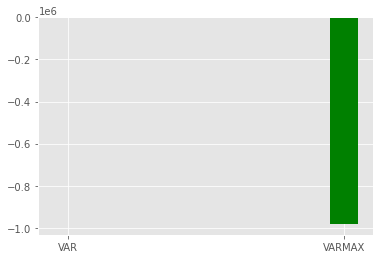

In [44]:
plt.bar(list(aic_values.keys()),list(aic_values.values()),color='green',width=0.1)
plt.show()